<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%201%EC%9D%BC/12%EC%9B%94_1%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정규화
- MinMax(이상치에 민감), standardization(이상치에 상대적으로 둔감)
- 위 2가지 알아두면됨

In [ ]:
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Raw Data Set
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')

training_data = df[['Temp', 'Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
training_data = training_data.dropna(how='any')
# 2. 이상치 처리!
zscore_threshold = 1.8

outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

# 내가 가진 DataFrame에서 이상치를 제거하면 되요!
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]

# 3. 정규화 진행(Normalization)
#    - 모든 feature에 대해 scale을 0과 1로 변경!
#    - 프로그램적으로 이 작업을 하려면 코드작업 해야 해서 좀 그래요
#    - sklearn을 이용하면 이 정규화 작업을 아주 쉽게 할 수 있어요!
#    - StandardScaler 사용시 코드는 동일 but MinMaxScaler -> StandardScaler
scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

scaler_x.fit(training_data['Temp'].values.reshape(-1,1))
scaler_t.fit(training_data['Ozone'].values.reshape(-1,1))

# Training Data Set 준비
x_data = scaler_x.transform(training_data['Temp'].values.reshape(-1,1))
t_data = scaler_t.transform(training_data['Ozone'].values.reshape(-1,1))

In [ ]:
# Python 직접구현

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 수치미분 코드
def numerical_derivative(f,x):

    # f : 미분하려고하는 다변수 함수
    # x : 모든 변수를 포함하는 ndarray  [1.0 2.0]
    # 리턴되는 결과는 [8.0 15.0]

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   #  [0.0 0.0]

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index  # 현재의 index를 추출 => tuple형태로 리턴.

        tmp = x[idx]    # 현재 index의 값을 일단 잠시 보존해야해요!
                        # 밑에서 이 값을 변경해서 중앙차분 값을 계산해야 해요!
                        # 그런데 우리 편미분해야해요. 다음 변수 편미분할때
                        # 원래값으로 복원해야 편미분이 정상적으로 진행되기 때문에
                        # 이값을 잠시 보관했다가 원상태로 복구해야 해요!
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Model을 만들어야 하는데.. y = Wx + b
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function(MSE)
def loss_func(input_data):

    input_w = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_w) + input_b

    return np.mean(np.power((t_data-y),2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):

    return np.dot(x, W) + b

# learning rate 정의(hyperparameter)
learning_rate = 1e-4

# 학습진행
for step in range(300000):

    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

# 학습 종료 후 예측하기
# 62도에서의 오존량은?
# 지금 모델의 값은 모두 0~1사이의 값이므로 변형 필요
my_data = np.array([[62]])
scaled_my_data = scaler_x.transform(my_data)
scaled_result = predict(scaled_my_data)

# 다시 원상 복귀시켜야겠죠
result = scaler_t.inverse_transform(scaled_result)
result

W : [[0.0080922]], b : [0.50300171], loss : 0.088101917688775
W : [[0.17207653]], b : [0.30179468], loss : 0.05602530211475827
W : [[0.33455982]], b : [0.21530282], loss : 0.04466659358032989
W : [[0.45957497]], b : [0.1487985], loss : 0.03794436198272469
W : [[0.55574838]], b : [0.09763714], loss : 0.03396605672618655
W : [[0.629734]], b : [0.05827902], loss : 0.03161164324245007
W : [[0.68665069]], b : [0.02800106], loss : 0.03021827031228353
W : [[0.73043636]], b : [0.00470841], loss : 0.02939365384795713
W : [[0.76412041]], b : [-0.01321049], loss : 0.028905634956161275
W : [[0.79003334]], b : [-0.02699539], loss : 0.02861681894404806


array([[7.11003564]])

In [ ]:
# 같은 내용을 이제 Tensorflow Keras를 이용해서 구현!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Model 생성
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')

model.add(output_layer)

# model 설정
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss='mse')

# model 학습
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

# 학습이 끝났으니 예측을 해 보아요!
my_data = np.array([[62]])
scaled_my_data = scaler_x.transform(my_data)
scaled_result = model.predict(scaled_my_data)

# 다시 원상복귀 시켜야 겠죠.
result = scaler_t.inverse_transform(scaled_result)
print(result)


# 그래프로 확인해 보아요!
# W와 b가 필요해요!
weights, bias = output_layer.get_weights()

1/1 [==============================] - 0s 131ms/step
[[4.4390764]]


In [ ]:
# 정답(?)을 확인하기 위해 sklearn 구현을 해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# 학습이 끝났으니 예측을 해 보아요!
my_data = np.array([[62]])
scaled_my_data = scaler_x.transform(my_data)
scaled_result = sklearn_model.predict(scaled_my_data)

# 다시 원상복귀 시켜야 겠죠.
result = scaler_t.inverse_transform(scaled_result)
print(result)

[[4.51299041]]


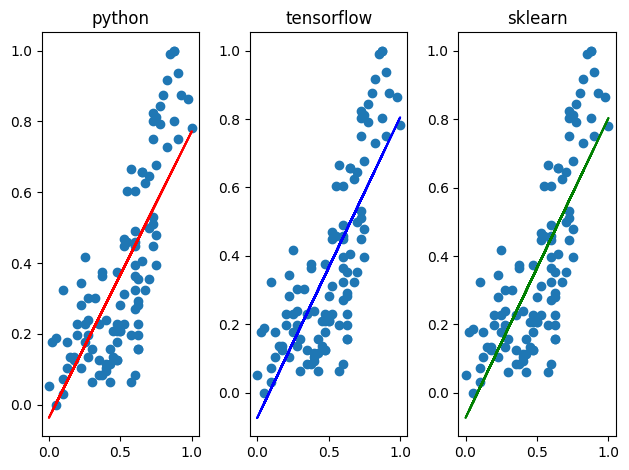

In [ ]:
####### 결과를 그래프로 확인해 보아요! #########

fig = plt.figure()

fig_python = fig.add_subplot(1,3,1)
fig_tensorflow = fig.add_subplot(1,3,2)
fig_sklearn = fig.add_subplot(1,3,3)

fig_python.set_title('python')
fig_tensorflow.set_title('tensorflow')
fig_sklearn.set_title('sklearn')

fig_python.scatter(x_data, t_data)
fig_python.plot(x_data, x_data*W.ravel() + b, color='r')

fig_tensorflow.scatter(x_data, t_data)
fig_tensorflow.plot(x_data, x_data*weights + bias, color='b')

fig_sklearn.scatter(x_data, t_data)
fig_sklearn.plot(x_data,
                 x_data*sklearn_model.coef_ + sklearn_model.intercept_,
                 color='g')

plt.tight_layout()
plt.show()

# Multiple Linear Regresssion

In [ ]:
# 필요한 model import
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

In [ ]:
# 데이터 로딩과 전처리!

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')

training_data = df[['Solar.R','Wind','Temp','Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
training_data = training_data.dropna(how='any')
# 2. 이상치 처리!
zscore_threshold = 1.8

outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

# 내가 가진 DataFrame에서 이상치를 제거하면 되요!
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]

x_data = training_data.drop('Ozone',axis=1,inplace=False).values
t_data = training_data['Ozone'].values.reshape(-1,1)

# 3. 정규화 진행(Normalization)
#    - 모든 feature에 대해 scale을 0과 1로 변경!
#    - 프로그램적으로 이 작업을 하려면 코드작업 해야 해서 좀 그래요
#    - sklearn을 이용하면 이 정규화 작업을 아주 쉽게 할 수 있어요!
#    - StandardScaler 사용시 코드는 동일 but MinMaxScaler -> StandardScaler
scaled_x = MinMaxScaler()
scaled_t = MinMaxScaler()

scaled_x.fit(x_data)
scaled_t.fit(t_data)

# Training Data Set 준비
x_data_norm = scaled_x.transform(x_data)  # 2차원 배열로 넣어줘야 함
t_data_norm = scaled_t.transform(t_data)


In [ ]:
# Tensorflow로 구현해보아요!

# Model 생성
keras_model = Sequential()
keras_model.add(Flatten(input_shape=(3,)))
keras_model.add(Dense(units=1,
                      activation='linear'))

# Model 설정
keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='mse')

# Model 학습
keras_model.fit(x_data_norm,
                t_data_norm,
                epochs=1000,
                verbose=0)
# Model을 이용한 예측
my_data = np.array([[150.0, 10.0, 80.0]])
scaled_my_data = scaled_x.transform(my_data)

scaled_result = keras_model.predict(scaled_my_data)
result = scaled_t.inverse_transform(scaled_result)
print(f'결과로 알아낸 오존량은 : {result}')

1/1 [==============================] - 0s 189ms/step
결과로 알아낸 오존량은 : [[39.636505]]


In [ ]:
# sklearn 구현
# sklearn은 정규화 하지 않은 데이터 넣어도 내부적으로 알아서 처리해줌

# model 생성
sklearn_model = linear_model.LinearRegression()

# model 학습
sklearn_model.fit(x_data, t_data)

# model로 예측
my_data = np.array([[150.0, 10.0, 80.0]])
result = sklearn_model.predict(my_data)
print(f'결과로 알아낸 오존량은 : {result}')

결과로 알아낸 오존량은 : [[40.34973385]]


# Logistic Regression

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
# logistic regression의 의미를 코드를 통해
# 그림을 통해 알아보아요

import numpy as np
from sklearn import linear_model
import mglearn
import matplotlib.pyplot as plt


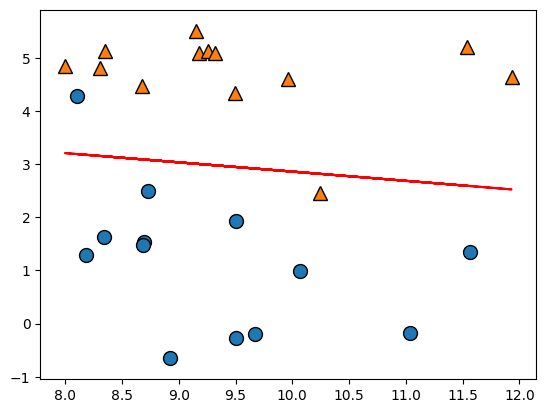

In [ ]:
# Training Data Set -> t_data가 0과 1로 구성되어 있으면 logistic 회귀 사용
x,t = mglearn.datasets.make_forge()

# 이 데이터를 2차원 평면에 점을 찍어서 표현
# x안에 있는 2개의 값을 x축, y축의 값으로 이용
# 그리고 각 데이터의 target(정답)의 값이 0이면 네모, 1이면 세모
mglearn.discrete_scatter(x[:,0], x[:,1], t)

# 이제 이 모델을 이용해서 구현
model = linear_model.LinearRegression()
model.fit(x[:,0].reshape(-1,1),
          x[:,1].reshape(-1,1))

# 이렇게 학습을 시키면 우리의 모델이 완성
# W와 b를 구할 수 있어요!
plt.plot(x[:,0], x[:,0]*model.coef_.ravel() + model.intercept_,
         color='r')
plt.show()

[[0.63265306]]


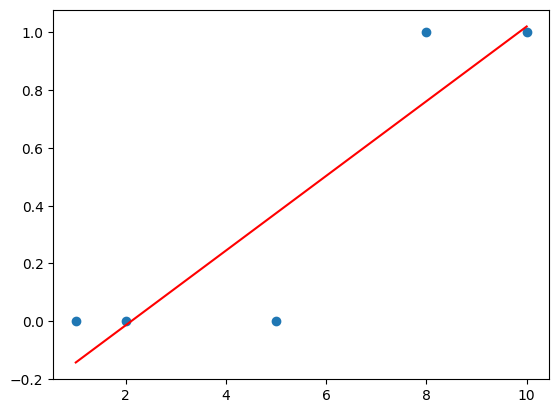

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Training Data Set
x_data = np.array([1,2,5,8,10])  # 공부시간
t_data = np.array([0,0,0,1,1]) # 합격여부

# simple linear regression을 해 보아요!
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1),
          t_data.reshape(-1,1))

print(model.predict(np.array([[7]]))) # [[0.63265306]]

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_,
         color='r')
plt.show()

[[0.41831972]]


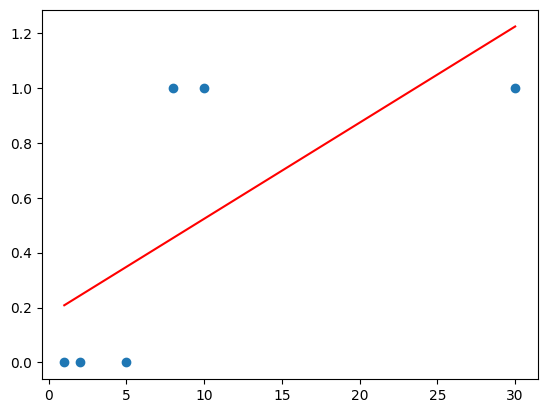

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Training Data Set
x_data = np.array([1,2,5,8,10,30])  # 공부시간
t_data = np.array([0,0,0,1,1,1]) # 합격여부

# simple linear regression을 해 보아요!
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1),
          t_data.reshape(-1,1))

print(model.predict(np.array([[7]]))) # [[0.41831972]]

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_,
         color='r')
plt.show()

In [ ]:
# Logistic Regression을 구현해 보아요!
# sklearn과 tensorflow를 이용해서 구현할꺼예요!
# 간단한 데이터를 이용해서 모델을 완성하고 예측을 해 보아요!

import numpy as np
from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Training Data Set
# 공부시간에 따른 시험합격여부
x_data = np.arange(2,21,2).reshape(-1,1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1)

# sklearn 구현
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data, t_data.ravel())

study_hour = np.array([[13]])
result = sklearn_model.predict(study_hour)
print(result)

# 확률값을 알고 싶으면
result_proba = sklearn_model.predict_proba(study_hour)
print(result_proba)

# tensorflow 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))

keras_model.add(Dense(units=1,
                      activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='binary_crossentropy')

keras_model.fit(x_data,
                t_data,
                epochs=500,
                verbose=0)

keras_result = keras_model.predict(study_hour)
print(keras_result)

[0]
[[0.50009391 0.49990609]]
1/1 [==============================] - 0s 165ms/step
[[0.59861743]]
